In [7]:
import pickle
import sys
import os 
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import itertools
import utils
from sklearn.metrics import r2_score
import sRAD_v3 as sRAD
import time


In [8]:
#####load the simulated data

#0. define the variable:
b = 0.0 # noise level on bulk data
s = 0.0 # noise level on singe cell data
n = 1   # bulk sample number
lam = 0.1   # penalty value

with open('../simulated_data/0.0_0.0_1.pickle', 'rb') as handle:
                data = pickle.load(handle)
result_dir = '../results'
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
   
# 1. get the true data
B = data['B']
C = data['trueC']
S = data['S']
F = data['trueF']
mu = data['mu']
K = C.shape[1]
k = S.shape[1]
y = K - k
m = B.shape[0]

# 2. initialize variables:
C1_init = S
C2_init = np.zeros((m, y))
C_init = np.hstack((C1_init, C2_init))
F_init = sRAD._quad_prog_BCmu2F(B, C_init) # solve F as initialization
mu_init = sRAD._linear_reg_mu(C1_init, S)

In [9]:
# 3. solve the deconvolution and save the result
# the default iteration number is 1000, you can decrease it to 500
# this may take couple of hours, have a rest...
inferC, inferF, infermu, list_err = sRAD._rna_coordescent(B, C1_init, C2_init, F_init, S, mu_init, lam)

results = {'inferC': inferC, 'inferF': inferF, 'infermu':infermu, 'k':k, 
           'listErr':list_err,}

Iteration: 1000, Last Error: 0.03400265095692531 
--------------------------------


In [5]:
## save the results
with open('../results/result_%s_%s_%s_%s.pickle' % (b, s, n, lam), 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()


(0.9876371255714602,
 0.00047854620182933633,
 0.9894171060361047,
 0.07059884893364099)

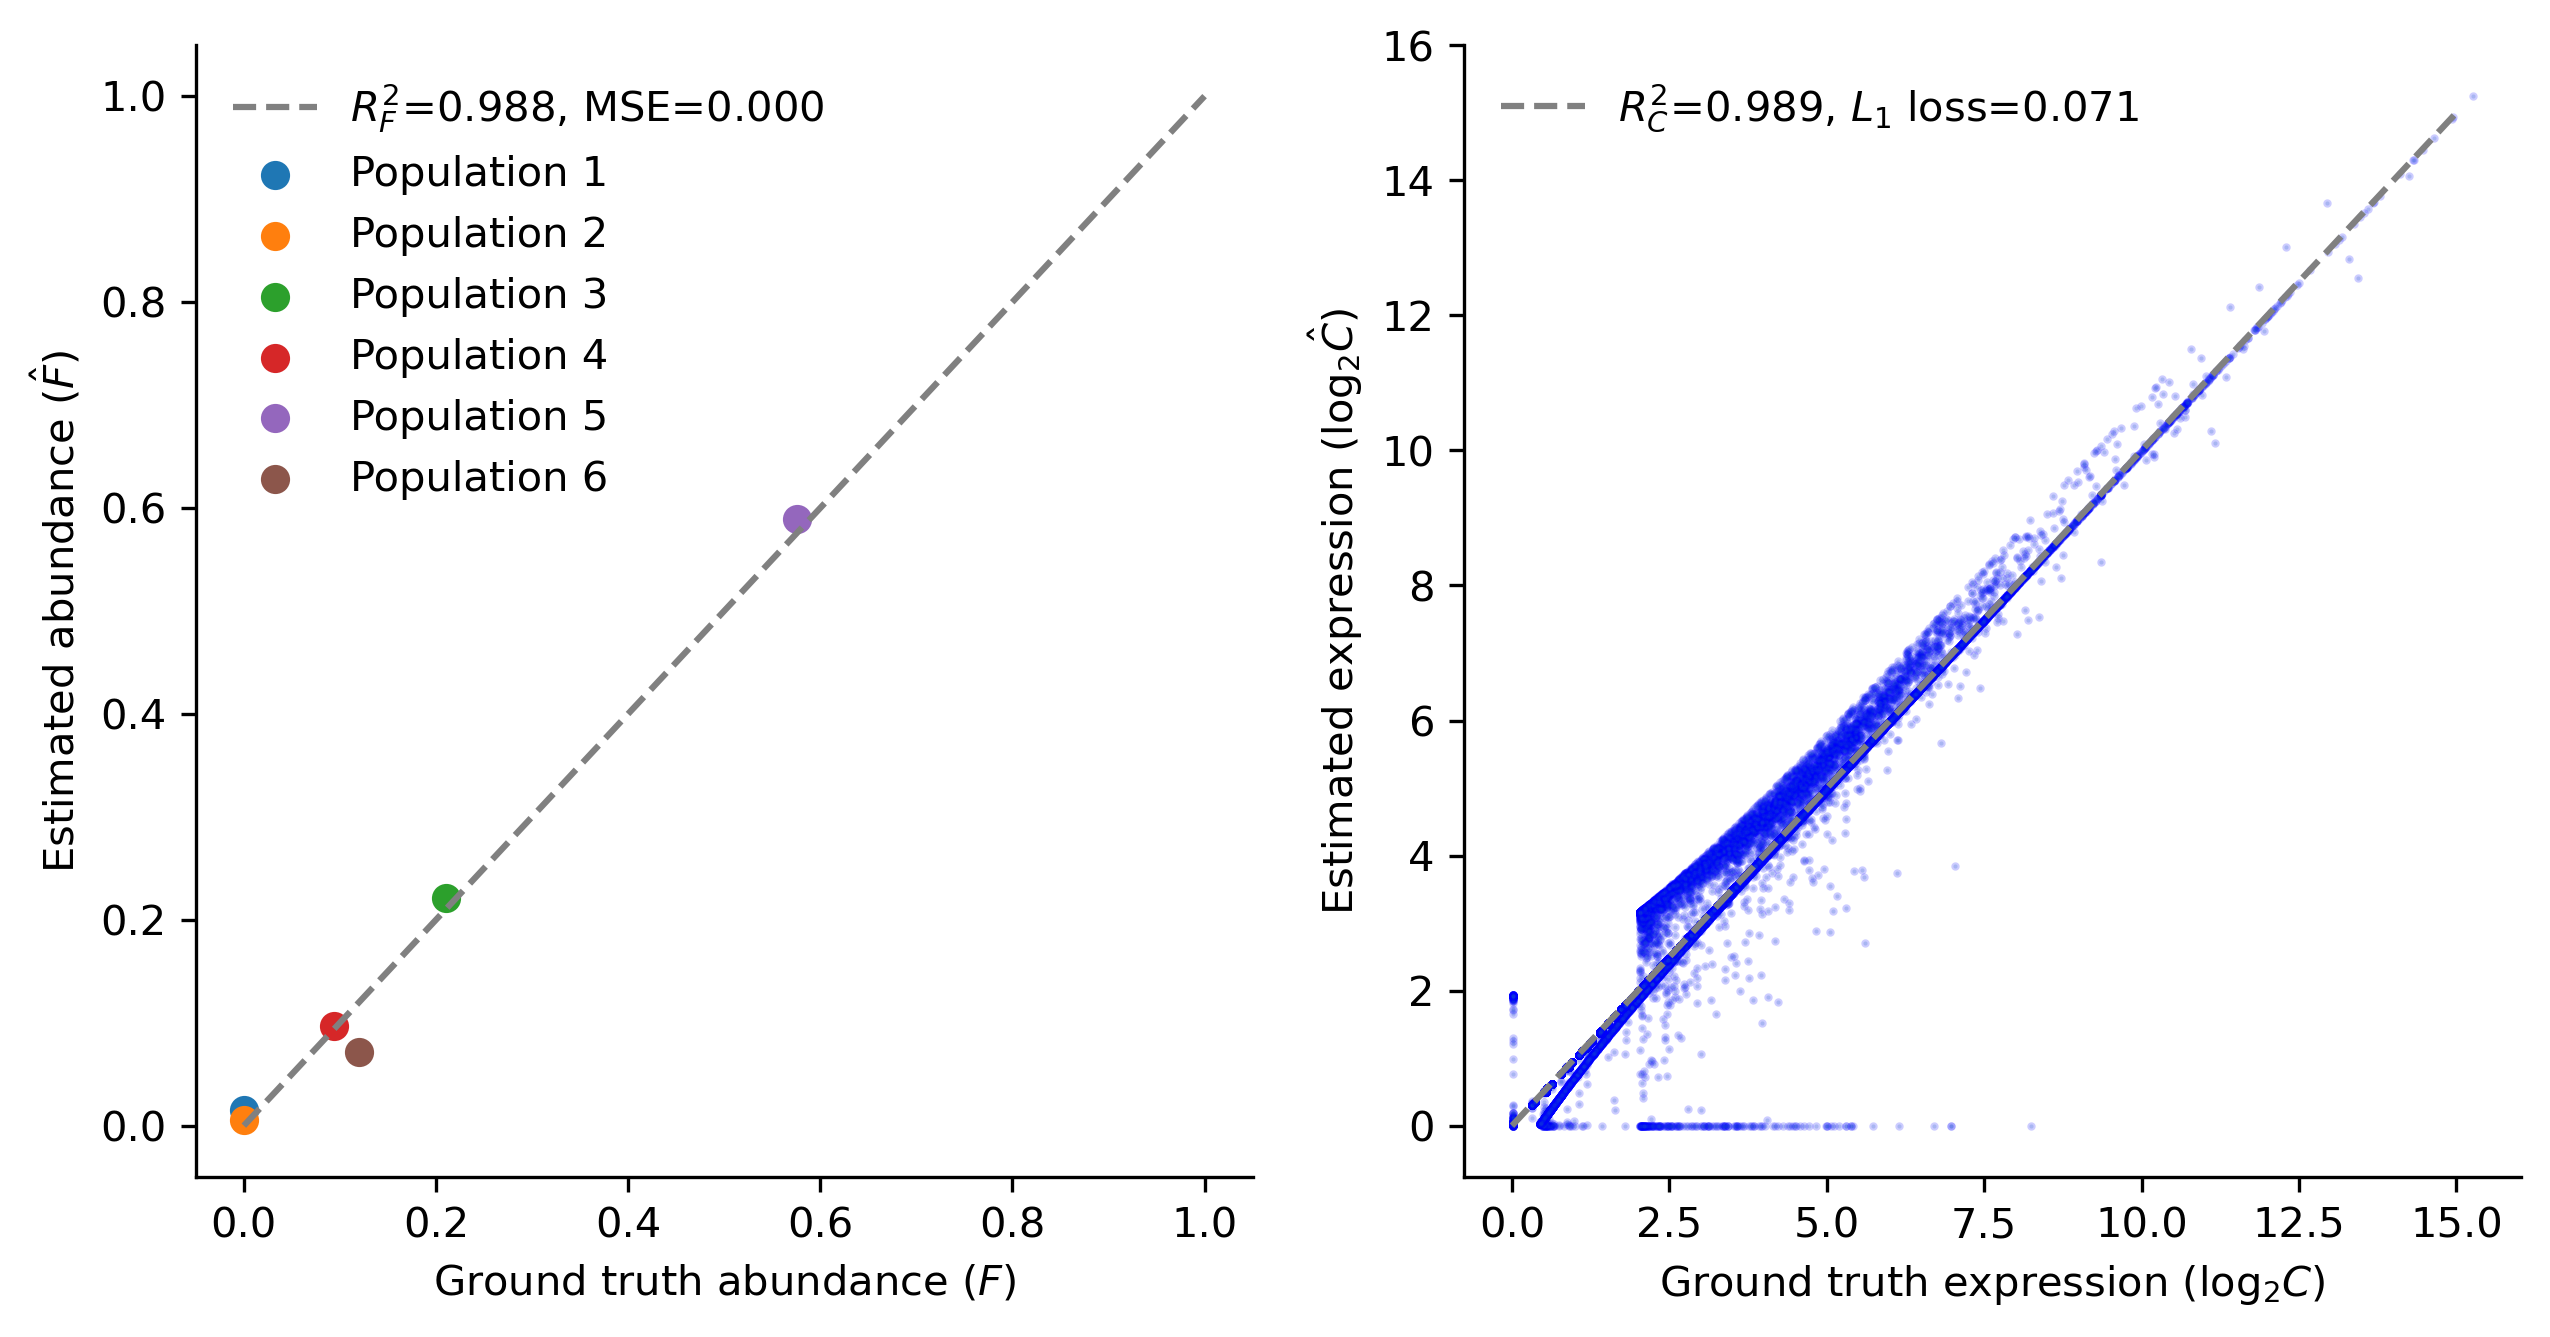

In [6]:
# 4. plot the result
b = 0.0
s = 0.0
n = 1
lam = 0.1

sim_data, result = utils.load_result(b, s, n, lam)
utils.eval_plot(sim_data, result)